In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

In [20]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
database_path = '/Users/christinemagnotta/Booty/10-Advanced-Data-Storage-and-Retrieval/HW/Instructions/Resources/hawaii.sqlite'
engine = create_engine(f"sqlite:///{database_path}")


In [25]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [26]:
Base.classes.keys()

['measurement', 'station']

In [28]:
#Save references to each table

# Create our session (link) from Python to the DB

In [31]:
session = Session(engine)

Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#The last is 8/23/17
#dt.date(year, month, day)
#dt.timedelta(days=365)

previousYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [33]:
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previousYear).all()

In [35]:
precipitationDF = pd.DataFrame(precipitation) 

In [36]:
precipitationDF

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


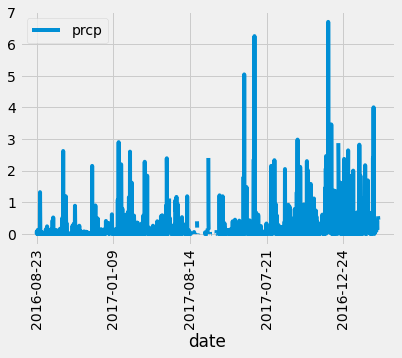

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitationDF.plot(x='date', y='prcp', rot=90)


In [42]:
stationCount = session.query(func.count(Station.station)).all()

#stationList = session.query.count()(station.date, Measurement.prcp).filter(Measurement.date >= previousYear).all()

In [43]:
stationCount

[(9)]

In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station,(func.count(Measurement.station))).group_by(Measurement.station)

In [56]:
active_station.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#The most active station is USC00519281

avg_station_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
min_station_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_station_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

In [63]:
print(avg_station_temperature, min_station_temperature, max_station_temperature)

[(71.66378066378067,)] [(54.0,)] [(85.0,)]


In [65]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_temperature = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()

In [67]:
station_temperatureDF = pd.DataFrame(station_temperature)
station_temperatureDF

,tobs
0,70.0
1,62.0
2,74.0
3,75.0
4,74.0
...,...
2767,77.0
2768,77.0
2769,76.0
2770,76.0


Text(0.5, 0, 'Temperature')

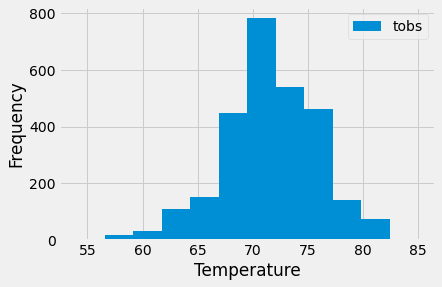

In [72]:
station_temperatureDF.plot.hist(bins=12)
plt.xlabel("Temperature")